In [6]:
from PIL import Image
import os
import json
import cv2
import matplotlib.pyplot as plt
from data.image_folder import make_dataset
import numpy as np

In [108]:
def hist_compare1(image1, image2):
    """直方图比较函数1"""
    hist_1 = []
    for i in [0,1,2]:
        hist = cv2.calcHist([image1_hsv],[i], None, [256], [0, 255]) 
        hist_1.append(hist)
    hist_2 = []
    for i in [0,1,2]:
        hist = cv2.calcHist([image2_hsv],[i], None, [256], [0, 255]) 
        hist_2.append(hist)

    CORREL_retvals = []
    for i in [0, 1, 2]:
        retval = cv2.compareHist(hist_1[i], hist_2[i], method=cv2.HISTCMP_CORREL)
        CORREL_retvals.append(retval)
    CORREL = np.mean(CORREL_retvals)
    # print("巴氏距离：%s, 相关性：%s, 卡方：%s" %(CORREL, CORREL, CORREL))
    CORREL = CORREL * 0.5 + 0.5
    return CORREL
# 0.70278   0.701095  0.7135
hist_compare1(synthesize_image, style_image) 

0.6889628166804684

In [136]:
def hist_compare2(image1, image2):
    """直方图比较函数2"""
    hist1 = cv2.calcHist([image1], [0, 1, 2], None, [128, 128, 128], [0, 255, 0, 255, 0, 255])
    hist2 = cv2.calcHist([image2], [0, 1, 2], None, [128, 128, 128], [0, 255, 0, 255, 0, 255])
    hist1 = cv2.normalize(hist1, hist1).flatten()
    hist2 = cv2.normalize(hist2, hist2).flatten()       
    CORREL = cv2.compareHist(hist1, hist2, method=cv2.HISTCMP_CORREL)

    # print("巴氏距离：%s, 相关性：%s, 卡方：%s" %(CORREL, CORREL, CORREL))
    CORREL = CORREL * 0.5 + 0.5
    return CORREL

hist_compare2(synthesize_hsv, style_hsv)
# 200： 0.500707 180：0.506255  150：0.5005515

0.5417724930403178

In [119]:
def hist_compare3(image1, image2):
    """直方图比较函数3"""
    image1_hsv=cv2.cvtColor(image1, cv2.COLOR_BGR2HSV)
    image2_hsv=cv2.cvtColor(image2, cv2.COLOR_BGR2HSV)
    max_value = [180, 256, 256]
    hist_1 = []
    for i in [0,1,2]:
        hist = cv2.calcHist([image1_hsv],[i], None, [max_value[i]], [0, max_value[i]-1]) 
        hist_1.append(hist)
    hist_2 = []
    for i in [0,1,2]:
        hist = cv2.calcHist([image2_hsv],[i], None, [max_value[i]], [0, max_value[i]-1]) 
        hist_2.append(hist)

    CORREL_retvals = []
    for i in [0, 1, 2]:
        retval = cv2.compareHist(hist_1[i], hist_2[i], method=cv2.HISTCMP_CORREL)
        CORREL_retvals.append(retval)
    CORREL = np.mean(CORREL_retvals)
    # print("巴氏距离：%s, 相关性：%s, 卡方：%s" %(CORREL, CORREL, CORREL))
    CORREL = CORREL * 0.5 + 0.5
    return CORREL
# 0.70278   0.701095  0.7135
hist_compare3(synthesize_image, style_image) 

0.7276552075666306

In [130]:
def hist_compare4(image1, image2):
    """直方图比较函数4"""
    image1_hsv=cv2.cvtColor(image1, cv2.COLOR_BGR2HSV)
    image2_hsv=cv2.cvtColor(image2, cv2.COLOR_BGR2HSV)
    hist1 = cv2.calcHist([image1_hsv], [0, 1], None, [180, 256, 256], [0, 179, 0, 255, 0, 255])
    hist2 = cv2.calcHist([image2_hsv], [0, 1], None, [180, 256, 256], [0, 179, 0, 255, 0, 255])
    CORREL = cv2.compareHist(hist1, hist2, method=cv2.HISTCMP_CORREL)

    # print("巴氏距离：%s, 相关性：%s, 卡方：%s" %(CORREL, CORREL, CORREL))
    CORREL = CORREL * 0.5 + 0.5
    return CORREL

hist_compare4(synthesize_hsv, style_hsv)
# 200： 0.500707 180：0.506255  150：0.5005515

0.628489104348797

In [171]:
ref_path =  r'label_to_img.json'
image_dir = r'D:\Competition\Jittor\train_resized\imgs'
label_dir = r'D:\Competition\Jittor\val_A_labels_resized'
synthesize_dir = r'D:\Competition\Jittor\submits\results_150'

label_paths = make_dataset(
            label_dir, recursive=False, read_cache=True)
with open(ref_path, 'r') as f:
    ref_dict = json.load(f)

correl_list = []
i = 0
for label_path in label_paths:
    label = cv2.imread(label_path, cv2.IMREAD_GRAYSCALE)
    # print(label.shape)
    label_name = os.path.basename(label_path)
    
    style_name = ref_dict[label_name]
    style_path = os.path.join(image_dir, style_name)
    style_image = cv2.imread(style_path)
    # print(style_image.shape)

    synthesize_name = label_name.replace(".png",".jpg")
    synthesize_path = os.path.join(synthesize_dir, synthesize_name)
    synthesize_image = cv2.imread(synthesize_path)
    # print(synthesize_image.shape)

    correl = hist_compare2(synthesize_image, style_image)
    if correl==correl:
        correl_list.append(correl)
    i += 1

    if i == 3:
        break
print(np.mean(correl_list))

0.5160861087471967


In [174]:
transfer_img = np.zeros_like(synthesize_image)
for i in range(3):
    histImg, _ = np.histogram(synthesize_image[:,:,i], 256)  # 计算原始图像直方图
    histRef, _ = np.histogram(style_image[:,:,i], 256)  # 计算匹配模板直方图
    cdfImg = np.cumsum(histImg)  # 计算原始图像累积分布函数 CDF
    cdfRef = np.cumsum(histRef)  # 计算匹配模板累积分布函数 CDF
    for j in range(256):
        tmp = abs(cdfImg[j] - cdfRef)
        tmp = tmp.tolist()
        index = tmp.index(min(tmp))  # find the smallest number in tmp, get the index of this number
        transfer_img[:,:,i][synthesize_image[:,:,i]==j] = index
print(transfer_img.shape)

(384, 512, 3)


In [172]:
from skimage.exposure import match_histograms
transfer_img =match_histograms(synthesize_image, style_image).astype(np.uint8)

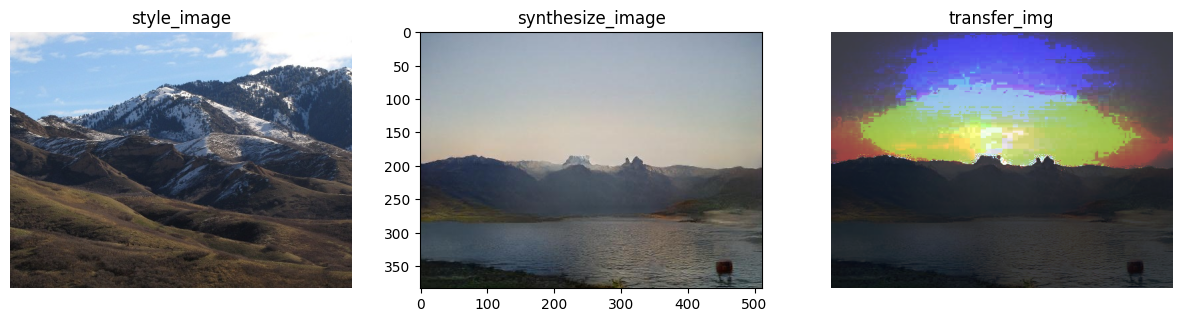

In [175]:
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
plt.imshow(cv2.cvtColor(style_image,cv2.COLOR_BGR2RGB)) 
plt.title('style_image')
plt.axis('off') 
plt.subplot(1,3,2)
plt.imshow(cv2.cvtColor(synthesize_image,cv2.COLOR_BGR2RGB)) 
plt.title('synthesize_image')
plt.subplot(1,3,3)
plt.imshow(cv2.cvtColor(transfer_img,cv2.COLOR_BGR2RGB)) 
plt.title('transfer_img')
plt.axis('off') 
plt.show()

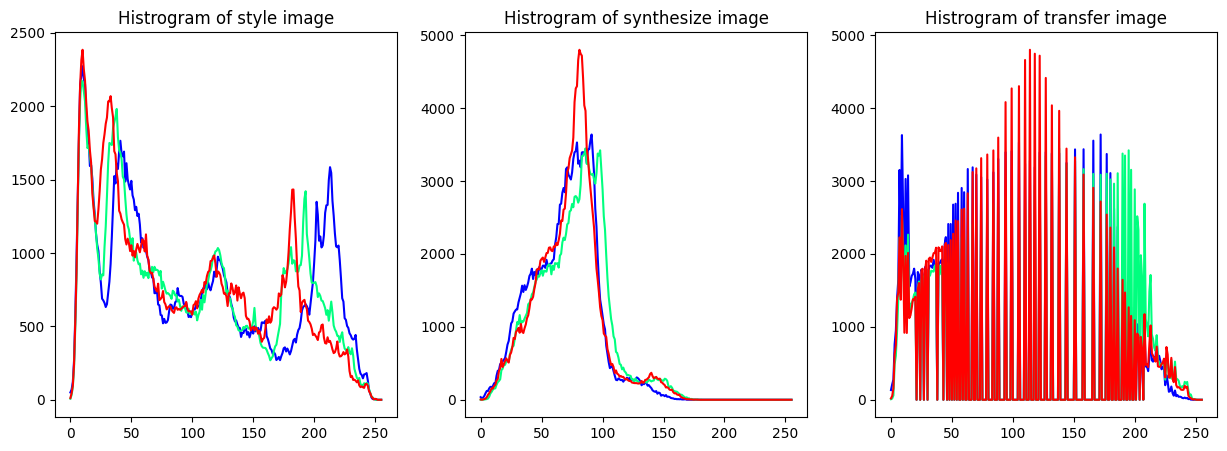

In [168]:
color = ['blue','springgreen','red']  #稍微调整显示颜色，提高可视化效果
plt.figure(figsize=(15, 5))

plt.subplot(1,3,1)
for i in [0,1,2]:
    style_hist = cv2.calcHist([style_image],[i], None, [256], [0, 255])   #彩色图有三个通道，通道b:0,g:1,r:2
    plt.plot(style_hist, color[i])
plt.title('Histrogram of style image')

plt.subplot(1,3,2)   
for i in [0,1,2]:
    synthesize_hist = cv2.calcHist([synthesize_image],[i], None, [256], [0, 255])   #彩色图有三个通道，通道b:0,g:1,r:2
    plt.plot(synthesize_hist, color[i])
plt.title('Histrogram of synthesize image')

plt.subplot(1,3,3)   
for i in [0,1,2]:
    transfer_hist = cv2.calcHist([transfer_img],[i], None, [256], [0, 255])   #彩色图有三个通道，通道b:0,g:1,r:2
    plt.plot(transfer_hist, color[i])
plt.title('Histrogram of transfer image')

plt.show()